In [1]:
## Importing the necessary libraries along with the standard import

import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib

In [2]:
df= pd.read_excel("tweet_data_clean.xlsx" )

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228013 entries, 0 to 228012
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        228013 non-null  int64 
 1   tweet_text        228004 non-null  object
 2   disaster          228013 non-null  int64 
 3   type_of_disaster  228013 non-null  object
 4   hashtags          228013 non-null  object
dtypes: int64(2), object(3)
memory usage: 8.7+ MB


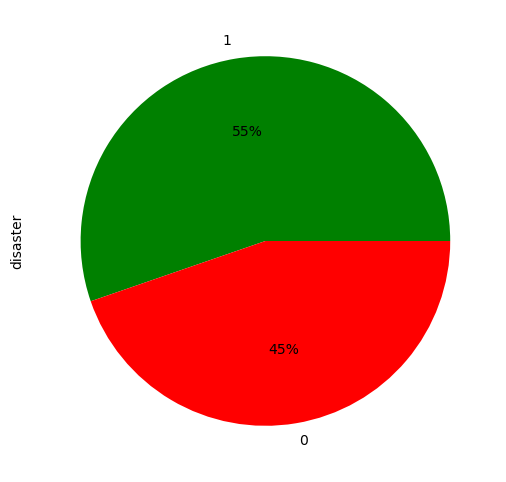

In [4]:
plt.figure(figsize=(8,6))
df.disaster.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green","red"])
plt.show()

In [5]:
df['tweet_text'] = df['tweet_text'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
df['tweet_text']

C:\Users\sruth\AppData\Local\Temp\ipykernel_27380\2830490482.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet_text'] = df['tweet_text'].str.replace('[^\w\s]','')


0         intern tattoo wisconsin ohio nc pa florida col...
1         jack ward fun thursday csindependent funbrief ...
2         welcome new studentathlete reagan biechler col...
3         denver post colorado governor sign bill create...
4         pretty sure m go live manitou spring co someda...
                                ...                        
228008    emergency hospital evacuation hurricane sandy ...
228009    americares provide medicine supply people impa...
228010    direct relief commits medical supply hurricane...
228011    direct relief commits medical supply hurricane...
228012    direct relief commits medical supply hurricane...
Name: tweet_text, Length: 228013, dtype: object

In [6]:
df['tweet_text'] = df['tweet_text'].astype(str)

df['tweet_text'] = df['tweet_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df

,Unnamed: 0,tweet_text,disaster,type_of_disaster,hashtags
0,0,intern tattoo wisconsin ohio nc pa florida col...,0,not disaster,"['intern', 'us', 'tattoo', 'wisconsin', 'ohio'..."
1,1,jack ward fun thursday csindependent funbrief ...,0,not disaster,"['funbrief', 'cosprings', 'colorado']"
2,2,welcome new studentathlete reagan biechler col...,0,not disaster,None
3,3,denver post colorado governor sign bill create...,0,not disaster,"['colorado', 'opengov']"
4,4,pretty sure m go live manitou spring co someda...,0,not disaster,['theplan']
...,...,...,...,...,...
228008,241875,emergency hospital evacuation hurricane sandy ...,1,hurricane,None
228009,241876,americares provide medicine supply people impa...,1,hurricane,['sandy']
228010,241877,direct relief commits medical supply hurricane...,1,hurricane,None
228011,241878,direct relief commits medical supply hurricane...,1,hurricane,None


In [7]:
df.drop(["Unnamed: 0", "disaster"], axis=1, inplace=True)
display(df)

,tweet_text,type_of_disaster,hashtags
0,intern tattoo wisconsin ohio nc pa florida col...,not disaster,"['intern', 'us', 'tattoo', 'wisconsin', 'ohio'..."
1,jack ward fun thursday csindependent funbrief ...,not disaster,"['funbrief', 'cosprings', 'colorado']"
2,welcome new studentathlete reagan biechler col...,not disaster,None
3,denver post colorado governor sign bill create...,not disaster,"['colorado', 'opengov']"
4,pretty sure m go live manitou spring co someda...,not disaster,['theplan']
...,...,...,...
228008,emergency hospital evacuation hurricane sandy ...,hurricane,None
228009,americares provide medicine supply people impa...,hurricane,['sandy']
228010,direct relief commits medical supply hurricane...,hurricane,None
228011,direct relief commits medical supply hurricane...,hurricane,None


In [8]:
df.drop(["hashtags"], axis=1, inplace=True)
display(df)

,tweet_text,type_of_disaster
0,intern tattoo wisconsin ohio nc pa florida col...,not disaster
1,jack ward fun thursday csindependent funbrief ...,not disaster
2,welcome new studentathlete reagan biechler col...,not disaster
3,denver post colorado governor sign bill create...,not disaster
4,pretty sure m go live manitou spring co someda...,not disaster
...,...,...
228008,emergency hospital evacuation hurricane sandy ...,hurricane
228009,americares provide medicine supply people impa...,hurricane
228010,direct relief commits medical supply hurricane...,hurricane
228011,direct relief commits medical supply hurricane...,hurricane


In [9]:
all_Words=[x for x in pd.Series(' '.join(df['tweet_text']).split())] 
# 1st we are spliting each row of the dataframe into words.
# 2nd we are joining all the above words with a space between them.
# 3rd we are making a Series out of it.
# 4th we we are extracting each word one by one and storing it in the variable all_Words.

In [10]:
nltk.FreqDist(all_Words).most_common(10)

[('number', 50838),
 ('t', 49540),
 ('user', 42084),
 ('hurricane', 36856),
 ('co', 32969),
 ('s', 31283),
 ('repeat', 23714),
 ('flood', 22232),
 ('car', 13438),
 ('food', 13360)]

In [11]:
# Defining a variable 'stopwords' which contains the list of punctuations from the string library and the english stopwords
# from nltk
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

# Converting all the words to lower casse
all_words = (x.lower() for x in all_Words)# we can skip this line since we have already converted all the words to lowercase
# Only keeping the words which are not the 'stopwords'
all_words_clean = [word for word in all_words if word not in stopwords]


# Creating a frequency distribution of the lower case words which does not contain any stopwords
all_words_freq = nltk.FreqDist(all_words_clean)

# Extracting the  most common 2000 words after the list of words have been converted to lowercase and the stopwords 
word_features = [item[0] for item in all_words_freq.most_common(2000)]

In [12]:
word_features

['number',
 'user',
 'hurricane',
 'co',
 'repeat',
 'flood',
 'car',
 'food',
 'go',
 'tornado',
 'people',
 'help',
 'shelter',
 'eahquake',
 'sandy',
 'news',
 'new',
 'amp',
 'need',
 'wildfire',
 'say',
 'get',
 'make',
 'day',
 'twitter',
 'dorian',
 'water',
 'harvey',
 'take',
 'good',
 'victim',
 'hit',
 'time',
 'please',
 'home',
 'irma',
 'smile',
 'come',
 'california',
 'see',
 'oklahoma',
 'love',
 'u',
 'fire',
 'today',
 'storm',
 'know',
 'relief',
 'ride',
 'nepal',
 'yycflood',
 'queensland',
 'look',
 'still',
 'safe',
 'blizzard',
 'matthew',
 'work',
 'watch',
 'think',
 'want',
 'australia',
 'affect',
 'kill',
 'video',
 'find',
 'family',
 'damage',
 'back',
 'lol',
 'bad',
 'everyone',
 'rescue',
 'donate',
 'c',
 'death',
 'city',
 'live',
 'e',
 'https',
 'florida',
 'stay',
 'pic',
 'way',
 'w',
 'year',
 'leave',
 'follow',
 'right',
 'p',
 'abflood',
 'dead',
 'calgary',
 'let',
 'typhoon',
 'life',
 'colorado',
 'area',
 'give',
 'photo',
 'update',
 'm

In [13]:
## We are defining a function to appropriately process the text document

def document_features(document): # we are naming the function as document_features
    document_words = set(document) #getting the unique number of entries in the document variable
    features = {} #defining an empty dictionary
    for word in word_features: #looping over the 'word_features' which has been defined in the last code block
        features['contains({})'.format(word)] = (word in document_words) #defining 'features' in  particular format
        # and checking whether the unique elements of the input 'document' are contained in the 'word_features' 
        # defined before
    return features

In [14]:
frame = df.copy() #storing tweets in another variables
frame.columns = ["feature", "label"] # defning the names of the colummn of the data frame 'frame'
frame['feature'] = frame.apply(lambda row: nltk.word_tokenize(str(row['feature'])), axis=1) #the features of the 'frame' data frame are stored in the variable 'feature'
# In the above code snippet we are tokenizing the variables
frame['label'] = frame.label # the labels of the 'frame' data frame are stored in the variable 'label'

In [15]:
processed_features = df.iloc[:, 0].values


In [16]:
labels = df.iloc[:, 1].values

In [17]:
processed_features

array(['intern tattoo wisconsin ohio nc pa florida colorado iowa virginia travel destination gt t co tihbjkf',
       'jack ward fun thursday csindependent funbrief ow ly br wi cosprings colorado',
       'welcome new studentathlete reagan biechler colorado spring co baseball t co lzeiympq',
       ...,
       'direct relief commits medical supply hurricane sandy recovery effo dlvr pz dk',
       'direct relief commits medical supply hurricane sandy noozhawk direct relief commits bit ly y qbf',
       'direct relief commits medical supply hurricane sandy recovery effo dlvr pz kq'],
      dtype=object)

In [18]:
labels

array(['not disaster', 'not disaster', 'not disaster', ..., 'hurricane',
       'hurricane', 'hurricane'], dtype=object)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8)
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [20]:
vectorizer

TfidfVectorizer(max_df=0.8, max_features=2500, min_df=7)

In [21]:
if '5s' in df.columns:
    # The column exists, so you can sort the DataFrame by it
    df.sort_values(by='5s', ascending=False).head()
else:
    # The column does not exist, so you cannot sort the DataFrame by it
    print("The column '5s' does not exist in the DataFrame")


The column '5s' does not exist in the DataFrame


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.3, random_state=0)

In [23]:
y_train

array(['not disaster', 'flood', 'not disaster', ..., 'flood',
       'not disaster', 'blizzard'], dtype=object)

In [24]:
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [25]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [26]:
import pandas as pd

X_train_df = pd.DataFrame(X_train)

X_train_small = X_train_df.sample(n=10000, random_state=42)

In [27]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import string

# Import the tweet data
df = pd.read_excel("tweet_data_clean.xlsx")

# Convert the tweet text to strings
df['tweet_text'] = df['tweet_text'].astype(str)

# Create a list of all the words in the tweet data
all_words = []
for tweet in df['tweet_text']:
    words = tweet.split()
    for word in words:
        all_words.append(word)

# Remove stopwords from the list of words
stopwords = nltk.corpus.stopwords.words('english') + list(string.punctuation)
all_words_clean = [word for word in all_words if word not in stopwords]

# Create a frequency distribution of the words
all_words_freq = nltk.FreqDist(all_words_clean)

# Extract the 2000 most common words
word_features = [item[0] for item in all_words_freq.most_common(2000)]

# Print the 2000 most common words
print(word_features)


['number', 'user', 'hurricane', 'co', 'repeat', 'flood', 'car', 'food', 'go', 'tornado', 'people', 'help', 'shelter', 'eahquake', 'sandy', 'news', 'new', 'amp', 'need', 'wildfire', 'say', 'get', 'make', 'day', 'twitter', 'dorian', 'water', 'harvey', 'take', 'good', 'victim', 'hit', 'time', 'please', 'home', 'irma', 'smile', 'come', 'california', 'see', 'oklahoma', 'love', 'u', 'fire', 'today', 'storm', 'know', 'relief', 'ride', 'nepal', 'yycflood', 'queensland', 'look', 'still', 'safe', 'blizzard', 'matthew', 'work', 'watch', 'think', 'want', 'australia', 'affect', 'kill', 'video', 'find', 'family', 'damage', 'back', 'lol', 'bad', 'everyone', 'rescue', 'donate', 'c', 'death', 'city', 'live', 'e', 'https', 'florida', 'stay', 'pic', 'way', 'w', 'year', 'leave', 'follow', 'right', 'p', 'abflood', 'dead', 'calgary', 'let', 'typhoon', 'life', 'colorado', 'area', 'give', 'photo', 'update', 'man', 'prayer', 'well', 'michael', 'hope', 'pray', 'really', 'much', 'power', 'keep', 'great', 'world'

In [28]:
import pandas as pd
import re
import string
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import spacy
from sklearn.naive_bayes import MultinomialNB
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop('type_of_disaster',axis=1)     # Predictor feature columns (8 X m)
Y = df['type_of_disaster']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Unnamed: 0,tweet_text,disaster,hashtags
175395,188277,number time feel friend one like get talk,0,None
88008,96230,nash facetimed love much talk mean everything ...,0,None
18736,20452,mother say ima good bf cause notice everything...,0,None
62260,67175,absolutely nowall trump want military amp vete...,0,None
160755,172732,battle chaser sine mora ex get physical releas...,1,None


In [38]:

# Preprocessing: Drop unnecessary columns
data = data[['tweet_text', 'disaster', 'type_of_disaster']]

# Drop rows with missing tweet_text values
data = data.dropna(subset=['tweet_text'])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['tweet_text'], data['disaster'], test_size=0.2, random_state=42)


In [39]:
# Handle missing values
imputer = SimpleImputer(strategy='constant', fill_value='')
X_train = imputer.fit_transform(X_train.values.reshape(-1, 1)).flatten()
X_test = imputer.transform(X_test.values.reshape(-1, 1)).flatten()

# Convert tweet text to strings
X_train = X_train.astype(str)
X_test = X_test.astype(str)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [43]:

# Train the Linear SVM classifier
svm_model = svm.LinearSVC()
svm_model.fit(X_train, y_train)


LinearSVC()

In [44]:
# Predict the labels for the test set
predictions = svm_model.predict(X_test)


In [45]:
# Predict the labels for the test set
predictions = svm_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9252209381373215


In [48]:
model_score = svm_model.score(X_train, y_train)  

In [50]:
# Train the Linear SVM classifier
svm_model = svm.LinearSVC()
svm_model.fit(X_train, y_train)

# Predict the labels for the training and test sets
y_train_predict = svm_model.predict(X_train)
y_test_predict = svm_model.predict(X_test)

# Evaluate the model performance
model_score = svm_model.score(X_test, y_test)
print("Model Score:", model_score)

print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification report

Model Score: 0.9252209381373215
[[78275  3146]
 [ 2318 98664]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     81421
           1       0.97      0.98      0.97    100982

    accuracy                           0.97    182403
   macro avg       0.97      0.97      0.97    182403
weighted avg       0.97      0.97      0.97    182403



In [51]:
# Recall data['tweet_text'] from above. It has been processed at a basic level!

data['tweet_text'].iloc[30:31] #Checking a tweet at random!

30    radio nowplaying radio app larimer county fire...
Name: tweet_text, dtype: object

In [56]:
pip install wordcloud

     -------------------------------------- 153.3/153.3 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


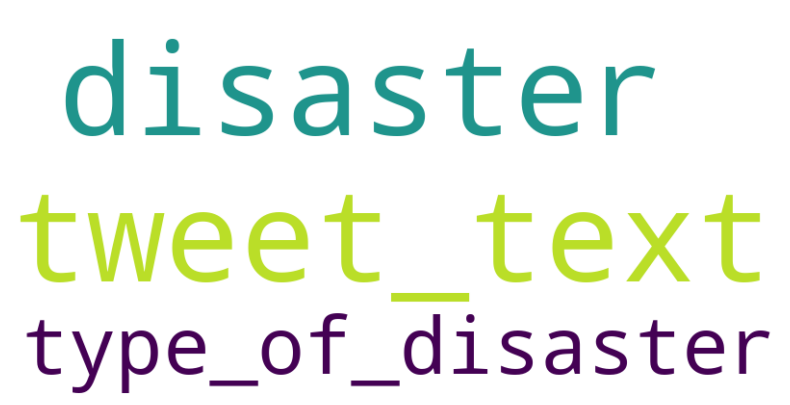

In [57]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have a list of text data called 'data'

# Concatenate all the text data into a single string
text = ' '.join(data)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

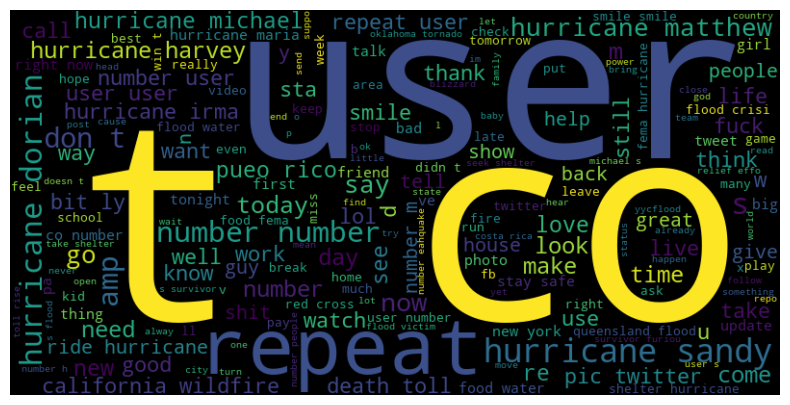

In [59]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have a DataFrame called 'data' with a column 'tweet_text'
tweets = data['tweet_text'].tolist()

# Filter out boolean values from tweets
tweets = [tweet for tweet in tweets if isinstance(tweet, str)]

# Join all the tweet texts into a single string
text = " ".join(tweets)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
